In [0]:
!pip install PyDrive

import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#TEST
downloaded = drive.CreateFile({'id':"1VccJxz7w_W8srYA-UDRURCujwaWhhPcq"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')
test_df = pd.read_csv('test.csv')
#TRAIN
downloaded = drive.CreateFile({'id':"1gwiV6F28tV0OdWWWbIsm_kY-NibNBPb7"}) 
downloaded.GetContentFile('train.csv')
train_df = pd.read_csv('train.csv')

In [0]:
# dimesions of dataframes
print(train_df.shape)
print(test_df.shape)

# controlling what the new dimension should be
new = int(train_df.shape[0]) + int(test_df.shape[0]) 
print(new)

# concatinating dataframes
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
#df['subject'] = df['subject'].astype(str)



# controlling new shape
print(df.shape)


(7352, 563)
(2947, 563)
10299
(10299, 563)


In [0]:
count_dict = {}

for col in df.columns:
    #print(col)
    cat = col.split('-')[0].split('(')[0]
    #print(cat)
    
    if cat in count_dict.keys():
        count_dict[cat] += 1
        #print(count_dict[cat])
    
    else:
        count_dict[cat] = 1
    
#print(count_dict)

count_df = pd.DataFrame.from_dict(count_dict, orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)
count_df

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [0]:
unique = df["Activity"].unique()
print(unique)


['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64


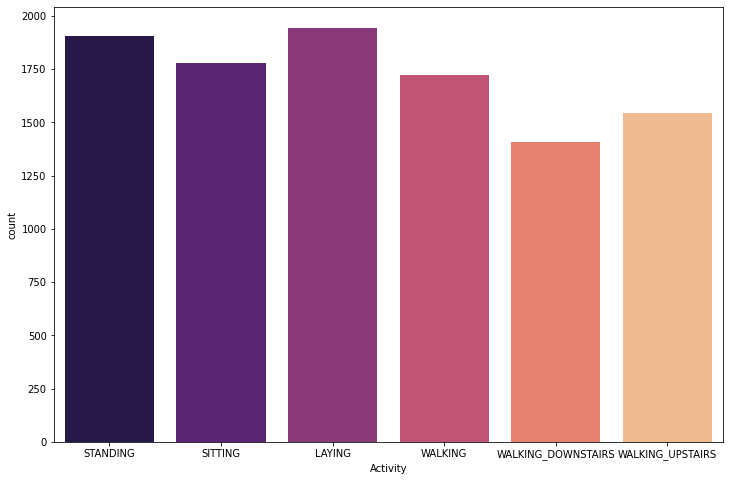

In [0]:

label = df['Activity']

label_count = label.value_counts()
print(label_count)


plt.figure(figsize=(12,8)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x=df['Activity'], palette="magma")
plt.show()


In [0]:
df["Activity"].tail()
        

10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Activity"] = le.fit_transform(df.Activity)

df["Activity"].tail()
    

10294    5
10295    5
10296    5
10297    5
10298    5
Name: Activity, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

X = np.array(df.drop(["Activity"], 1))
y = np.array(df["Activity"])

X.shape
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# PCA

Compute the covariance matrix $\mathbf{C}$ of the dimensions in the dataset, and perform an eigenvector decomposition of it, $\mathbf{C} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^T$. 

np.linalg.eig = Compute the eigenvalues and right eigenvectors of a square array.


In [0]:
Covariance = df.drop(["Activity"], axis=1).cov()

C = Covariance
print(C.shape)

eigenValues, eigenVectors = np.linalg.eig(C)

(562, 562)


# Plot Eigenvalues

Plot the eigenvalues, i.e., the diagonal elements of $\mathbf{\Lambda}$. 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


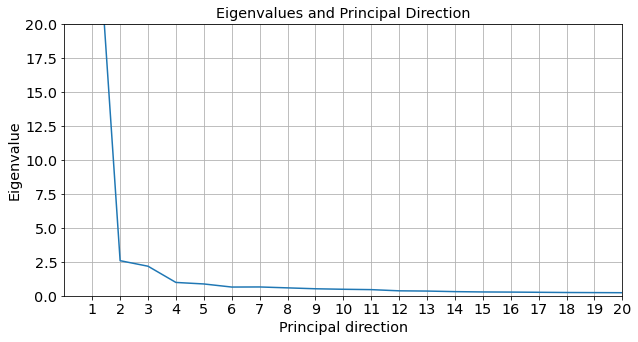

In [0]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(eigenValues)
plt.xticks(np.arange(1,562,1))
plt.ylabel('Eigenvalue')
plt.xlabel('Principal direction')
plt.xlim((0, 20))
plt.ylim((0,20))
plt.title("Eigenvalues and Principal Direction")
ax.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


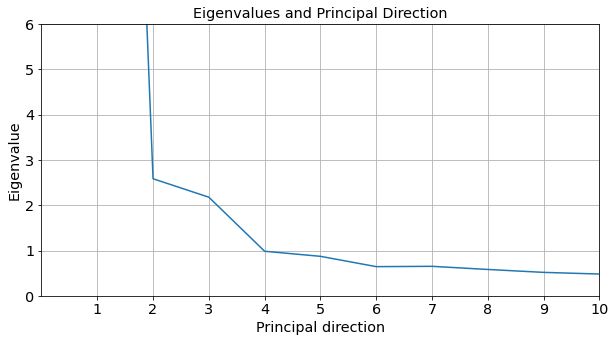

In [0]:
# SAME PLOT BUT MORE ZOOMED IN

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(eigenValues)
plt.xticks(np.arange(1,562,1))
plt.ylabel('Eigenvalue')
plt.xlabel('Principal direction')
plt.xlim((0, 10))
plt.ylim((0, 6))
plt.title("Eigenvalues and Principal Direction")
ax.grid()

plt.show()

### Result 
Seems like a feature selection of 3 or 5 is a good number to work with

# Plot Eigenvectors



/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


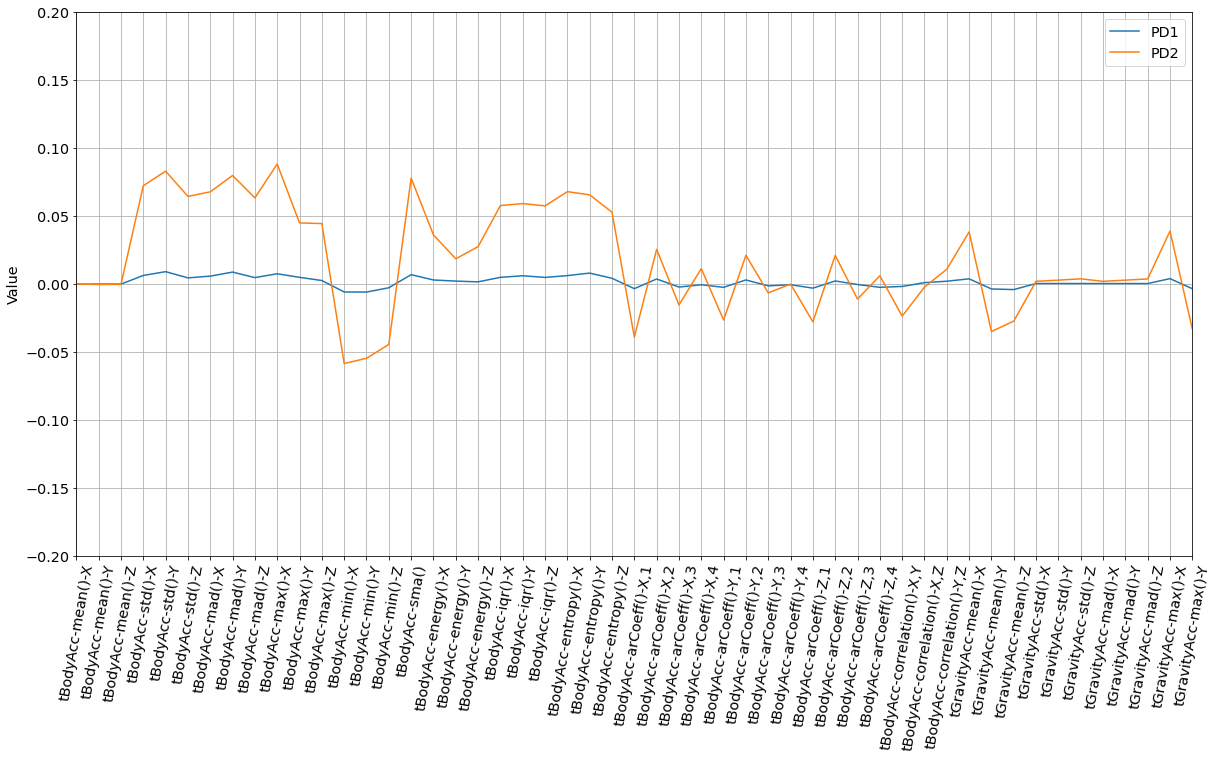

In [0]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(range(len(eigenValues)),eigenVectors[:,0:2])
plt.xticks(ticks = range(len(eigenValues)), labels=df.columns,rotation=80)
ax.legend(labels=['PD1','PD2'])
plt.ylabel('Value')
plt.xlim((0, 50))
plt.ylim((-0.2,0.2))
ax.grid()
plt.show()

## Project the mean-centered observations of the dataset onto the two eigenvectors PD1, PD2

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


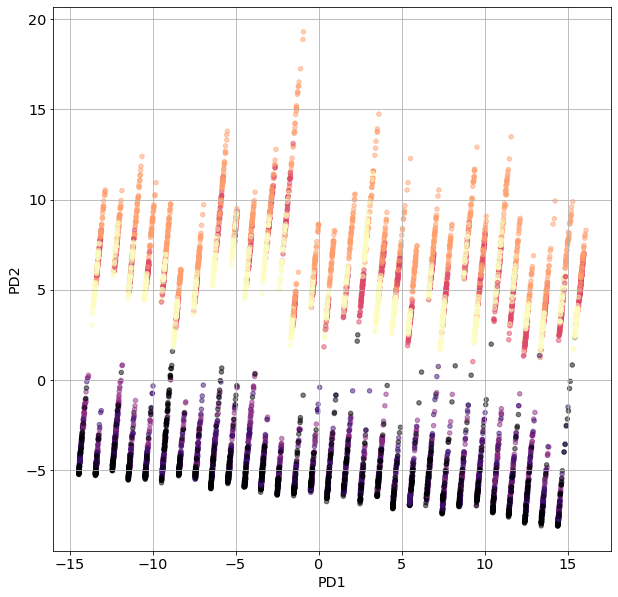

In [0]:
Xproj = np.dot(eigenVectors.T,(X-X.mean(axis=0)).T).T

import matplotlib.cm as cm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Xproj[:,0],Xproj[:,1],alpha=0.5, c=y, cmap=plt.cm.magma, s=20)
plt.xlabel('PD1')
plt.ylabel('PD2')
ax.grid()
plt.show()




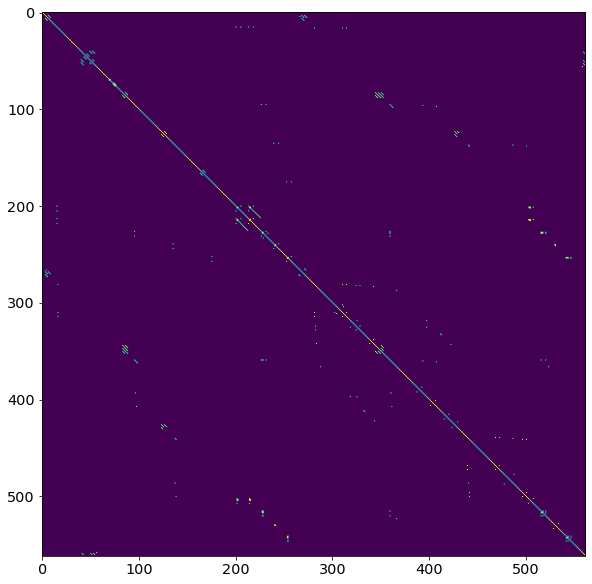

In [0]:
PC = df.drop(["Activity"], axis=1).corr()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(abs(PC)>0.99)


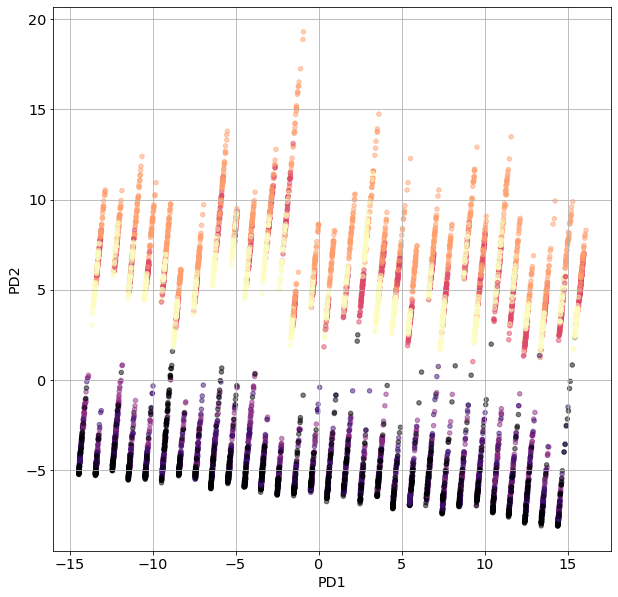

In [0]:
Xproj = np.dot(np.real(eigenVectors).T,(X-X.mean(axis=0)).T).T

import matplotlib.cm as cm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Xproj[:,0],Xproj[:,1],alpha=0.5, c=y, cmap=plt.cm.magma, s=20)
plt.xlabel('PD1')
plt.ylabel('PD2')
ax.grid()
plt.show()


## Project the mean-centered observations of the dataset onto the two eigenvectors PD2, PD3

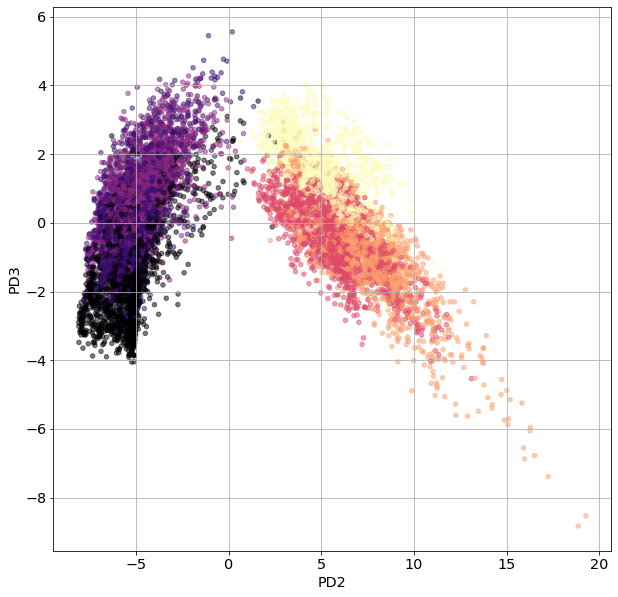

In [0]:

import matplotlib.cm as cm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Xproj[:,1],Xproj[:,2],alpha=0.5, c=y, cmap=plt.cm.magma, s=20)
plt.xlabel('PD2')
plt.ylabel('PD3')
ax.grid()
plt.show()

## Project the mean-centered observations of the dataset onto the two eigenvectors PD3, PD4

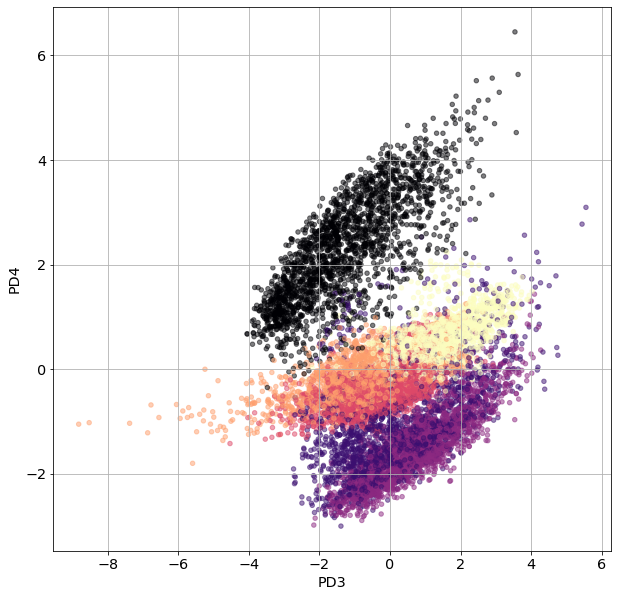

In [0]:
import matplotlib.cm as cm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Xproj[:,2],Xproj[:,3],alpha=0.5, c=y, cmap=plt.cm.magma, s=20)
plt.xlabel('PD3')
plt.ylabel('PD4')
ax.grid()
plt.show()

## Project the mean-centered observations of the dataset onto the two eigenvectors PD4, PD5

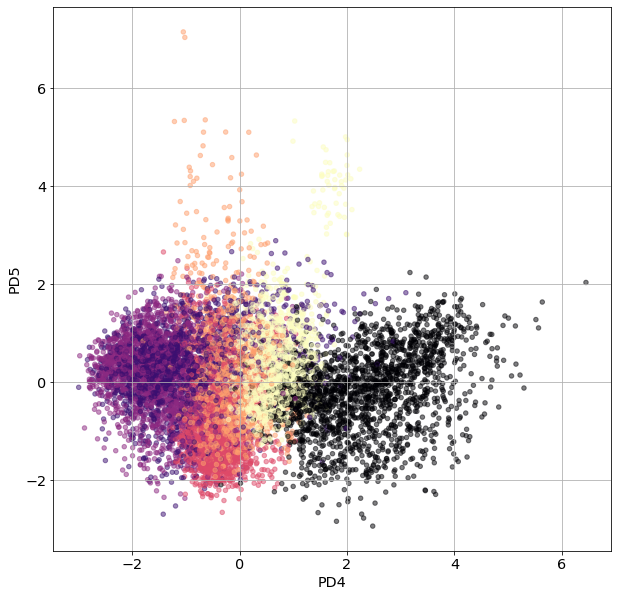

In [0]:

import matplotlib.cm as cm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Xproj[:,3],Xproj[:,4],alpha=0.5, c=y, cmap=plt.cm.magma, s=20)
plt.xlabel('PD4')
plt.ylabel('PD5')
ax.grid()
plt.show()

In [0]:

# Selected Features Dataframe
PCA_features = pd.DataFrame(Xproj[:,0:5])


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

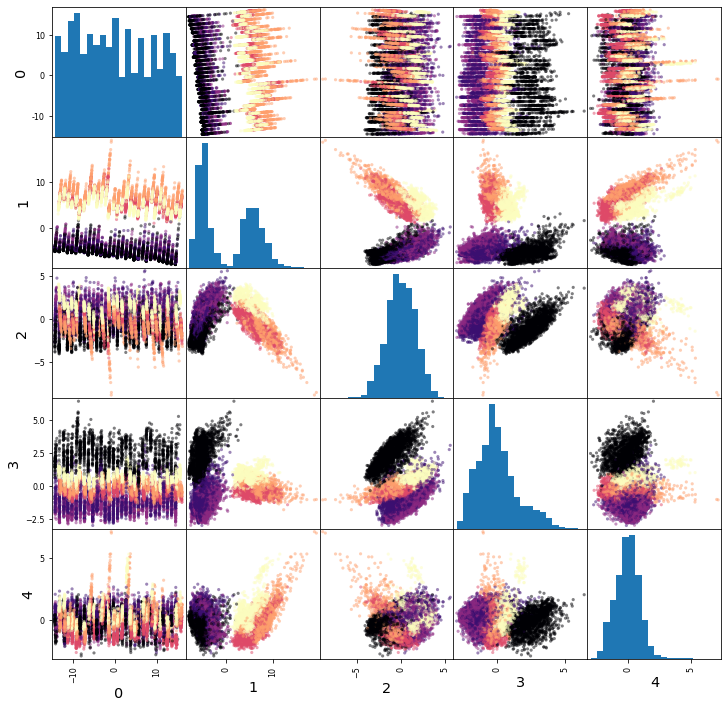

In [0]:
pd.plotting.scatter_matrix(PCA_features, c=y, figsize=(12, 12),
                           marker='o', hist_kwds={'bins': 20}, s=10,
                           alpha=.5, cmap=plt.cm.magma)

ax.grid()
plt.show()


# IDEAS:


### PCA and reduce dimensions from Lab3
Finding correlated features and picking the most correlated ones



### LogisticRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression



### Support Vector Clasifier
https://scikit-learn.org/stable/modules/svm.html#classification
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.



### Naive Bayes (lab4) 
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
https://scikit-learn.org/stable/modules/naive_bayes.html


# In other projects


### LightGBM (tree based)
Light GBM is a gradient boosting framework that uses tree based learning algorithm.

### XGBoost
XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance

### RandomForest Classifier


# Notes From Meeting



Dataset - split 70 percent of each activity (Stratify on Acivity)

Unupervized learning

Take training set, perform PCA, inspect egien valuses (plot)
Plot eigen vectors
projcts data onto first 2 principal directions (scatterplot)

Supervized learning
LDA - Baysan classification
KNN - 
Naivie Bayes - Gaussian

train and do classify testdata

PCA and feuture selection K best (look at class code) 


_____


take training set, perform pca
inspect eigenvalues, plot them
inspect the eigenvectors, plot them

stratified partitioning

project data onto first two principal directions (with highest eigenvalues)(make scatterplot)






supervised:
LDA (baigan? classification, (bayes))
KNN
Naive Bayes
(train)

classify test data:
confusion table accurace precision recall


feature selection(Kbest)


# Feature selection (Kbest)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectKBest, f_classif

dataValues = df
dataTarget = df['Activity']
dataValues = dataValues.drop('Activity',axis=1)

K = 10  # Amount of features to select

bestfeatures = SelectKBest(score_func=f_classif, k=K)  # Had to use f_classif instead of chi2 because some of the values were negative
fit = bestfeatures.fit(dataValues, dataTarget)
feat_importances = pd.Series(fit.scores_, index=dataValues.columns)
top_features = feat_importances.nlargest(K).copy().index.values
print("TOP FEATURES")
print(top_features)


# Create new df with feature selection.
feature_names = list(df.columns.values)
for i in range(len(top_features)):
  feature_names.remove(top_features[i])
  
kbest_features = df.drop(feature_names, axis=1)
print(kbest_features)


TOP FEATURES
['fBodyAccJerk-entropy()-X' 'tGravityAcc-mean()-X' 'tGravityAcc-min()-X'
 'tGravityAcc-max()-X' 'tGravityAcc-energy()-X' 'fBodyAccJerk-entropy()-Y'
 'fBodyBodyAccJerkMag-entropy()' 'tBodyAccJerkMag-entropy()'
 'fBodyAcc-entropy()-X' 'tBodyAccJerk-entropy()-X']
       tGravityAcc-mean()-X  ...  fBodyBodyAccJerkMag-entropy()
0                  0.963396  ...                      -1.000000
1                  0.966561  ...                      -1.000000
2                  0.966878  ...                      -1.000000
3                  0.967615  ...                      -1.000000
4                  0.968224  ...                      -1.000000
...                     ...  ...                            ...
10294              0.890968  ...                       0.214449
10295              0.891281  ...                       0.267662
10296              0.890897  ...                       0.239540
10297              0.892736  ...                       0.200361
10298              0.8

In [0]:
corr = kbest_features.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,tGravityAcc-mean()-X,tGravityAcc-max()-X,tGravityAcc-min()-X,tGravityAcc-energy()-X,tBodyAccJerk-entropy()-X,tBodyAccJerkMag-entropy(),fBodyAcc-entropy()-X,fBodyAccJerk-entropy()-X,fBodyAccJerk-entropy()-Y,fBodyBodyAccJerkMag-entropy()
tGravityAcc-mean()-X,1,0.997516,0.999021,0.983816,0.397156,0.423006,0.380144,0.421894,0.426132,0.418417
tGravityAcc-max()-X,0.997516,1,0.994282,0.981001,0.41019,0.43575,0.394833,0.432929,0.437429,0.43013
tGravityAcc-min()-X,0.999021,0.994282,1,0.983074,0.386437,0.411688,0.367343,0.411766,0.415878,0.407834
tGravityAcc-energy()-X,0.983816,0.981001,0.983074,1,0.39448,0.420878,0.377032,0.418393,0.422861,0.415098
tBodyAccJerk-entropy()-X,0.397156,0.41019,0.386437,0.39448,1,0.98706,0.980844,0.978782,0.976581,0.97043
tBodyAccJerkMag-entropy(),0.423006,0.43575,0.411688,0.420878,0.98706,1,0.989103,0.988234,0.98856,0.986555
fBodyAcc-entropy()-X,0.380144,0.394833,0.367343,0.377032,0.980844,0.989103,1,0.990276,0.982202,0.985798
fBodyAccJerk-entropy()-X,0.421894,0.432929,0.411766,0.418393,0.978782,0.988234,0.990276,1,0.987498,0.992399
fBodyAccJerk-entropy()-Y,0.426132,0.437429,0.415878,0.422861,0.976581,0.98856,0.982202,0.987498,1,0.987913
fBodyBodyAccJerkMag-entropy(),0.418417,0.43013,0.407834,0.415098,0.97043,0.986555,0.985798,0.992399,0.987913,1




# Naive Bayes classifier 

### All Features



In [0]:
# Import
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


X = np.array(df.drop(["Activity"], 1))
y = np.array(df["Activity"])

X.shape
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


# Gaussian applification
model = GaussianNB()

# Model training
classifier = model.fit(X_train, y_train)

# Output prediction
pred = model.predict(X_test)





Confusion matrix, without normalization
[[530  50   0   0   0   3]
 [  5 437  88   0   0   3]
 [  1 119 444   0   0   8]
 [  0   0   0 372  56  89]
 [  0   0   0  28 310  84]
 [  0   0   0  18  22 423]]
Normalized confusion matrix
[[0.90909091 0.08576329 0.         0.         0.         0.0051458 ]
 [0.00938086 0.81988743 0.16510319 0.         0.         0.00562852]
 [0.00174825 0.20804196 0.77622378 0.         0.         0.01398601]
 [0.         0.         0.         0.71953578 0.10831721 0.172147  ]
 [0.         0.         0.         0.06635071 0.73459716 0.19905213]
 [0.         0.         0.         0.03887689 0.0475162  0.91360691]]


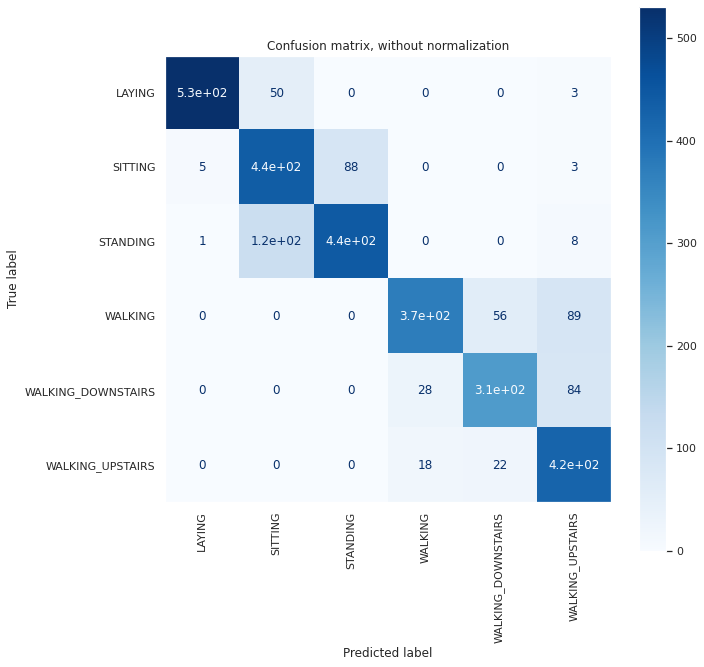

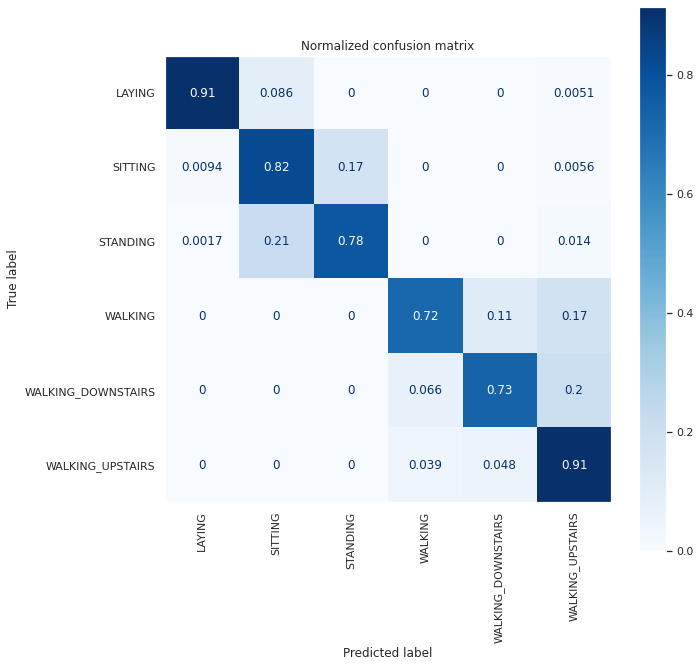

In [0]:
from sklearn.metrics import plot_confusion_matrix
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

class_names = le.inverse_transform(np.unique(pred))



# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation = "vertical", )
    disp.ax_.set_title(title)
    plt.grid(None)


    print(title)
    print(disp.confusion_matrix)


plt.show()

# Naive Bayes classifier 

### PCA Features


In [0]:
X = np.array(PCA_features)
y = np.array(df["Activity"])

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


# Gaussian applification
model = GaussianNB()

# Model training
classifier = model.fit(X_train, y_train)

# Output prediction
pred = model.predict(X_test)




(10299, 5)
(10299,)


Confusion matrix, without normalization
[[579   4   0   0   0   0]
 [ 22 268 238   0   0   5]
 [  0 116 452   0   0   4]
 [  0   0   0 375  82  60]
 [  0   0   0 128 225  69]
 [  0   0   0  27  40 396]]
Normalized confusion matrix
[[0.99313894 0.00686106 0.         0.         0.         0.        ]
 [0.0412758  0.50281426 0.44652908 0.         0.         0.00938086]
 [0.         0.2027972  0.79020979 0.         0.         0.00699301]
 [0.         0.         0.         0.72533849 0.15860735 0.11605416]
 [0.         0.         0.         0.30331754 0.53317536 0.16350711]
 [0.         0.         0.         0.05831533 0.08639309 0.85529158]]


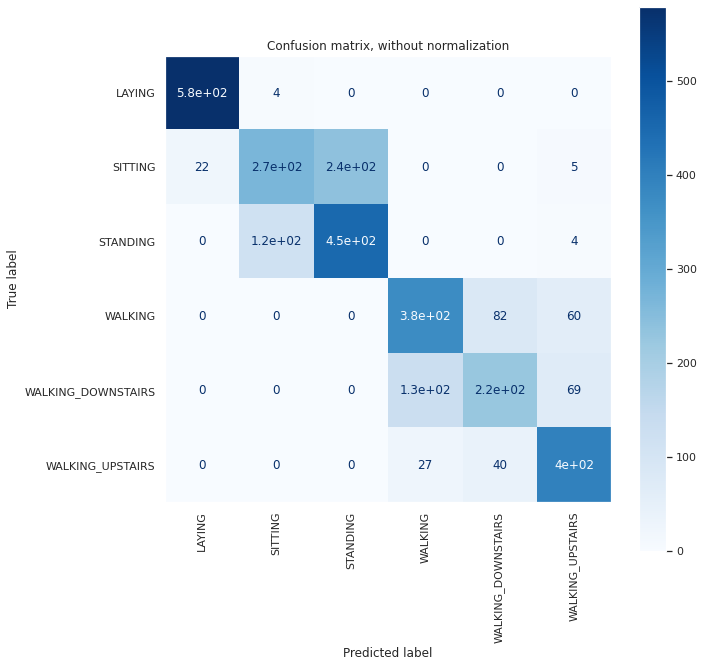

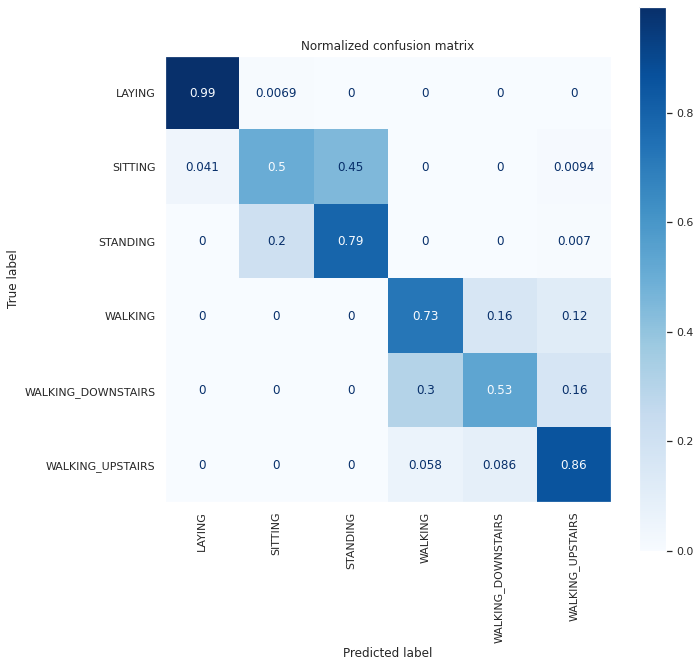

In [0]:
from sklearn.metrics import plot_confusion_matrix
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

class_names = le.inverse_transform(np.unique(pred))



# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation = "vertical", )
    disp.ax_.set_title(title)
    plt.grid(None)


    print(title)
    print(disp.confusion_matrix)


plt.show()

# Naive Bayes classifier 

### K Best


In [0]:
X = np.array(kbest_features)
y = np.array(df["Activity"])

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


# Gaussian applification
model = GaussianNB()

# Model training
classifier = model.fit(X_train, y_train)

# Output prediction
pred = model.predict(X_test)




(10299, 10)
(10299,)


Confusion matrix, without normalization
[[583   0   0   0   0   0]
 [  6 192 335   0   0   0]
 [  0  64 507   0   0   1]
 [  0   0   0 338 114  65]
 [  0   0   0  98 284  40]
 [  0   0   0 139  30 294]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.01125704 0.36022514 0.62851782 0.         0.         0.        ]
 [0.         0.11188811 0.88636364 0.         0.         0.00174825]
 [0.         0.         0.         0.65377176 0.2205029  0.12572534]
 [0.         0.         0.         0.23222749 0.67298578 0.09478673]
 [0.         0.         0.         0.30021598 0.06479482 0.6349892 ]]


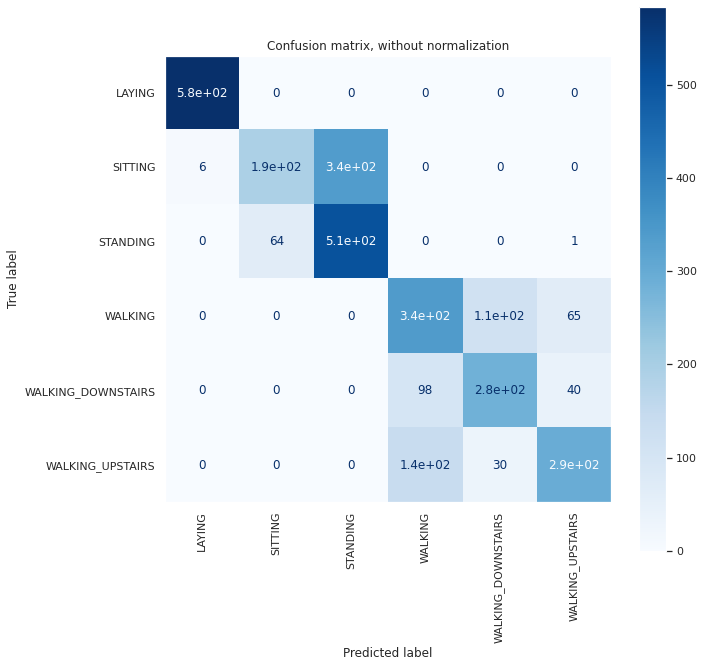

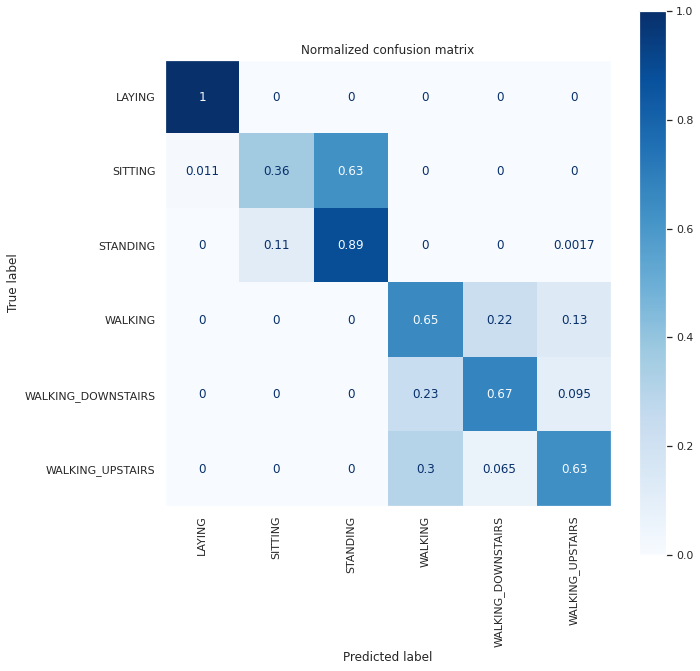

In [0]:
from sklearn.metrics import plot_confusion_matrix
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

class_names = le.inverse_transform(np.unique(pred))



# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation = "vertical", )
    disp.ax_.set_title(title)
    plt.grid(None)


    print(title)
    print(disp.confusion_matrix)


plt.show()


# Nearest Neighbor

### All Features


The maximum accuracy of for the test set is achieved for k=1.


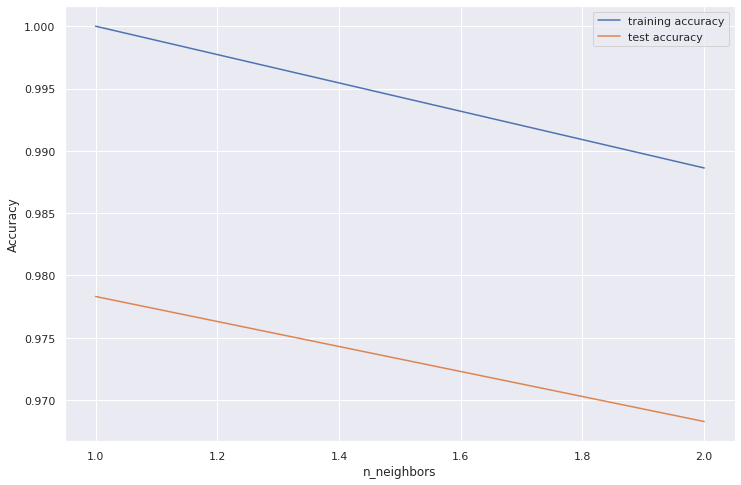

In [0]:
neighbors_settings = range(1, 3)
training_accuracy = []
test_accuracy = []


X = np.array(df.drop(["Activity"], 1))
y = np.array(df["Activity"])

X.shape
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier = clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(12, 8))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print("The maximum accuracy of for the test set is achieved for k={}.".format(neighbors_settings[np.argmax(test_accuracy)]))

Confusion matrix, without normalization
[[583   0   0   0   0   0]
 [  2 520  11   0   0   0]
 [  0  77 495   0   0   0]
 [  0   0   0 516   1   0]
 [  0   0   0   7 415   0]
 [  0   0   0   0   0 463]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.00375235 0.97560976 0.0206379  0.         0.         0.        ]
 [0.         0.13461538 0.86538462 0.         0.         0.        ]
 [0.         0.         0.         0.99806576 0.00193424 0.        ]
 [0.         0.         0.         0.01658768 0.98341232 0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


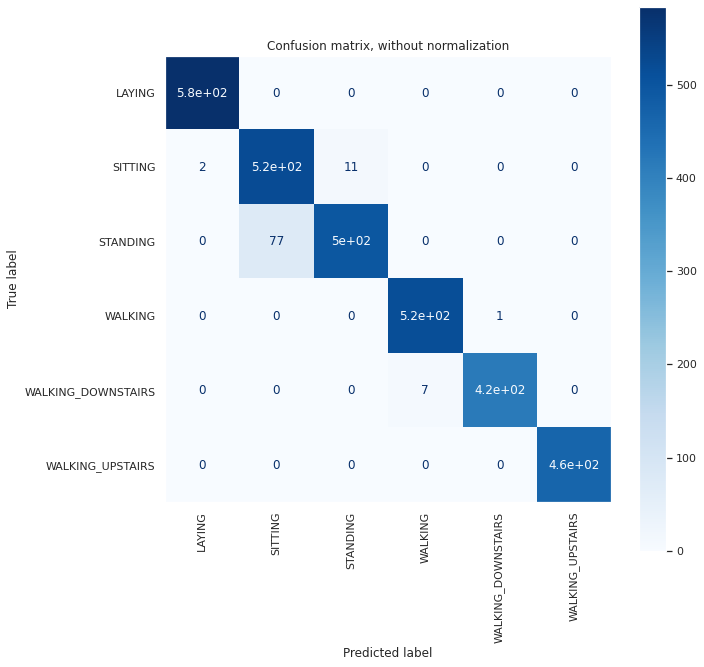

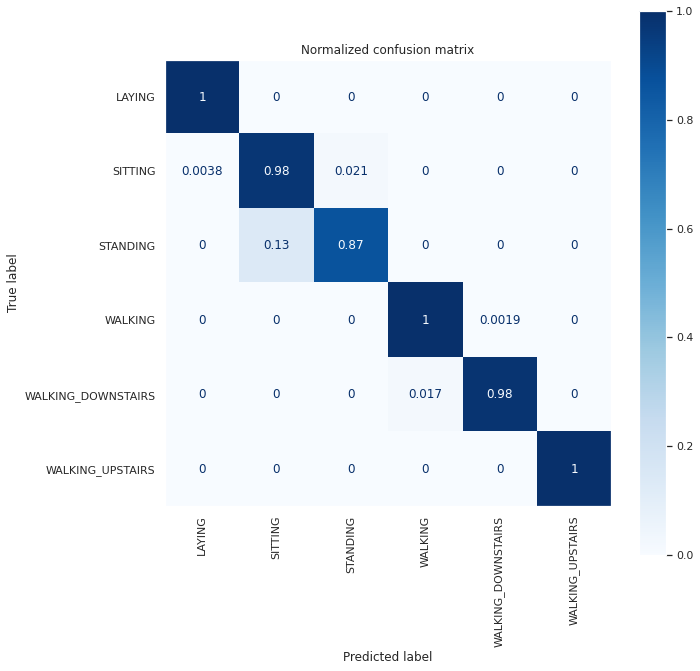

In [0]:

class_names = le.inverse_transform(np.unique(pred))

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation = "vertical", )
    disp.ax_.set_title(title)
    plt.grid(None)


    print(title)
    print(disp.confusion_matrix)


plt.show()


# Nearest Neighbor

### PCA Features


The maximum accuracy of for the test set is achieved for k=11.


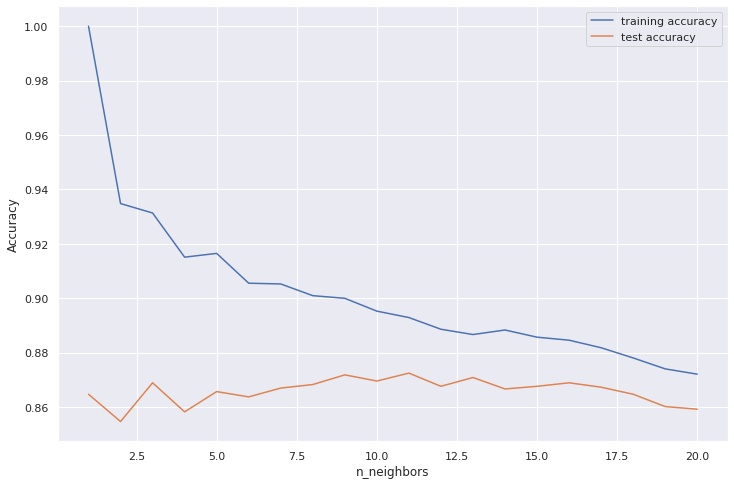

In [0]:

neighbors_settings = range(1, 21)
training_accuracy = []
test_accuracy = []

X = np.array(PCA_features)
y = np.array(df["Activity"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)



from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier = clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(12, 8))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print("The maximum accuracy of for the test set is achieved for k={}.".format(neighbors_settings[np.argmax(test_accuracy)]))

### PCA Features K = 11
 

Confusion matrix, without normalization
[[581   0   0   0   0   2]
 [  5 345 183   0   0   0]
 [  0 108 464   0   0   0]
 [  0   0   0 490  24   3]
 [  0   0   0  75 337  10]
 [  0   0   0   7  18 438]]
Normalized confusion matrix
[[0.99656947 0.         0.         0.         0.         0.00343053]
 [0.00938086 0.64727955 0.34333959 0.         0.         0.        ]
 [0.         0.18881119 0.81118881 0.         0.         0.        ]
 [0.         0.         0.         0.94777563 0.04642166 0.00580271]
 [0.         0.         0.         0.17772512 0.7985782  0.02369668]
 [0.         0.         0.         0.01511879 0.03887689 0.94600432]]


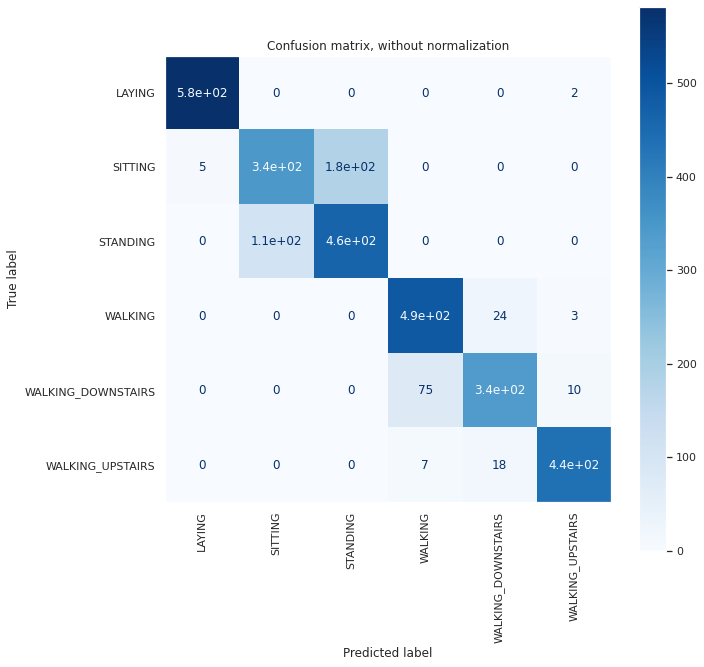

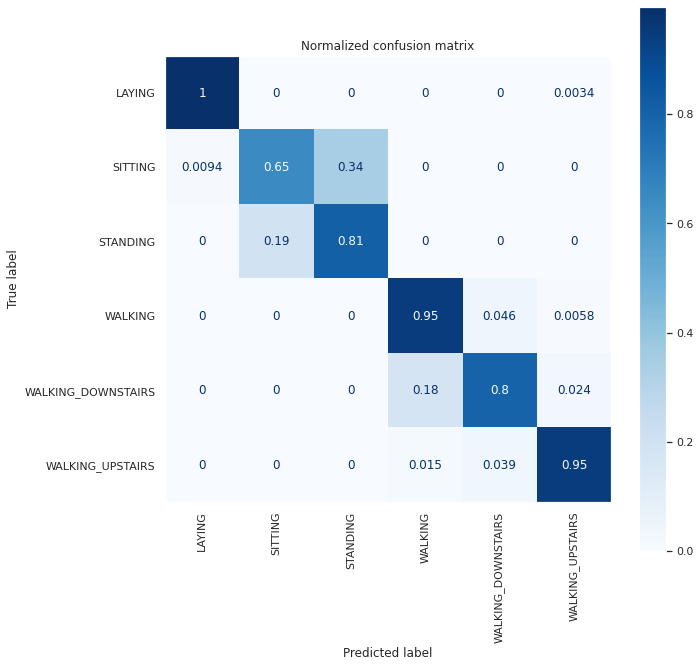

In [0]:

class_names = le.inverse_transform(np.unique(pred))

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation = "vertical", )
    disp.ax_.set_title(title)
    plt.grid(None)


    print(title)
    print(disp.confusion_matrix)


plt.show()


# Nearest Neighbor

### K Best Features


(10299, 10)
(10299,)
The maximum accuracy of for the test set is achieved for k=13.


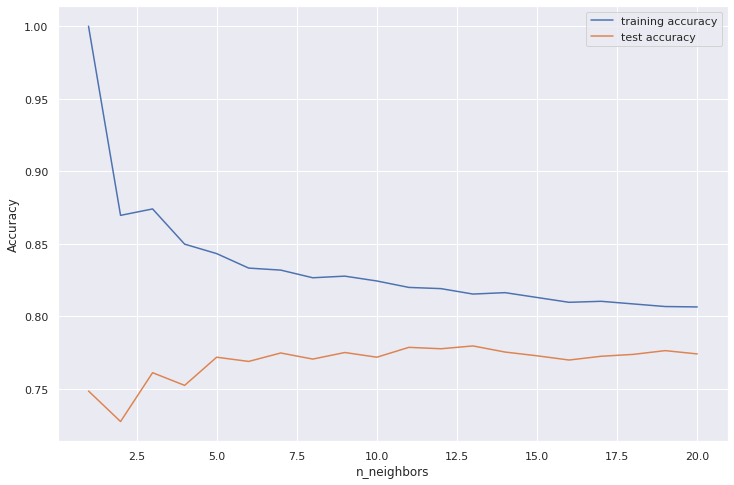

In [0]:

neighbors_settings = range(1, 21)
training_accuracy = []
test_accuracy = []

X = np.array(kbest_features)
y = np.array(df["Activity"])

print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier = clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(12, 8))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print("The maximum accuracy of for the test set is achieved for k={}.".format(neighbors_settings[np.argmax(test_accuracy)]))

Confusion matrix, without normalization
[[583   0   0   0   0   0]
 [  0 312 221   0   0   0]
 [  0 160 411   0   0   1]
 [  0   0   0 440  46  31]
 [  0   0   0  81 303  38]
 [  0   0   0  96  24 343]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.58536585 0.41463415 0.         0.         0.        ]
 [0.         0.27972028 0.71853147 0.         0.         0.00174825]
 [0.         0.         0.         0.85106383 0.08897485 0.05996132]
 [0.         0.         0.         0.19194313 0.71800948 0.09004739]
 [0.         0.         0.         0.20734341 0.05183585 0.74082073]]


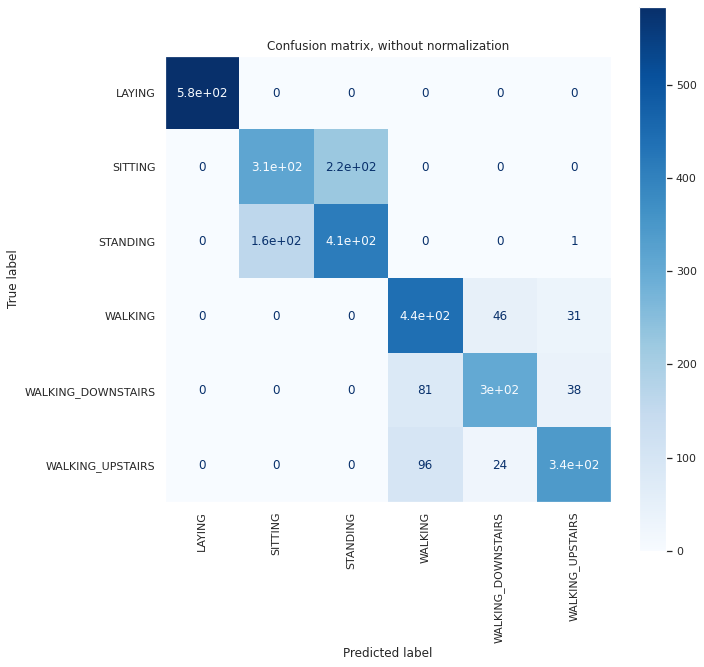

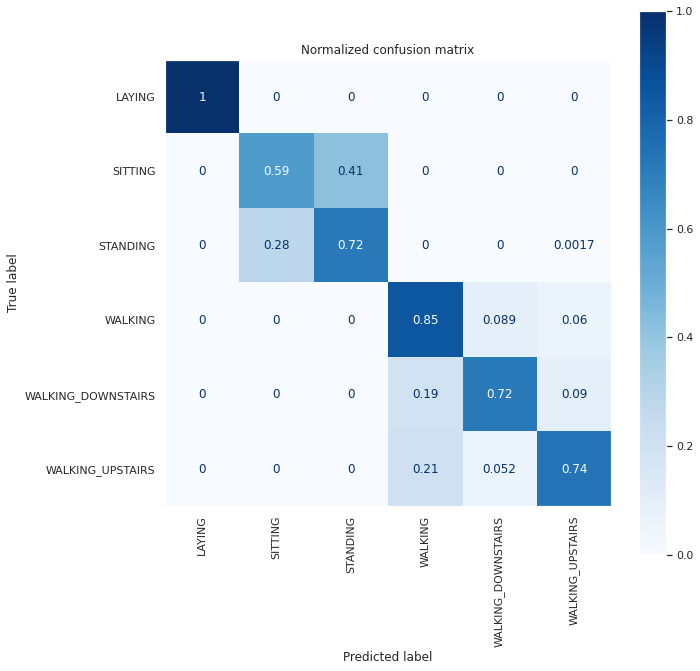

In [0]:
class_names = le.inverse_transform(np.unique(pred))

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation = "vertical", )
    disp.ax_.set_title(title)
    plt.grid(None)


    print(title)
    print(disp.confusion_matrix)


plt.show()

# Linear Discriminant Analysis - work in progress

https://www.knowledgehut.com/blog/data-science/linear-discriminant-analysis-for-machine-learning


In [0]:
# The built in LinearDiscriminantAnalysis seems to apply a naive bayes classifier 
# after the dimentionality reduction according to the documentation.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)

X = np.array(df.drop(["Activity"], 1))
y = np.array(df["Activity"])

X_lda = lda.fit_transform(X, y) #reduced data

print(X_lda.shape)
lda.explained_variance_ratio_



(10299, 5)


array([0.72706332, 0.19124872, 0.04738833, 0.02637732, 0.00792231])

In [0]:

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')–

SyntaxError: ignored

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=0, stratify=y)

data = DecisionTreeClassifier()
classifier = data.fit(X_train, y_train)
pred = data.predict(X_test)



In [0]:
class_names = le.inverse_transform(np.unique(pred))

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation = "vertical", )
    disp.ax_.set_title(title)
    plt.grid(None)


    print(title)
    print(disp.confusion_matrix)


plt.show()